In [37]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [38]:
# Reading the csv file
df = pd.read_csv("features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [39]:
# Shape of the data
df.shape

(9990, 60)

In [40]:
# Data type of the data
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

## Proposed Methodology
   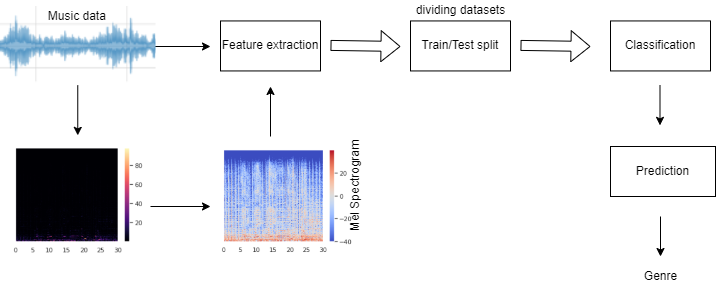

In [41]:
# Loading a sample audio from the dataset
audio ="genres_original/reggae/reggae.00010.wav"
data,sr=librosa.load(audio)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In order to work with audio data we use [Librosa](https://librosa.org/doc/latest/index.html), a python
package used for audio and music analysis. It is a powerful package widely used for
audio visualization and for building MIR systems. We will be using the package for
loading and visualizing the audio data.

In [42]:
# Initializing sample rate to 45600 we obtain the signal value array
librosa.load(audio,sr=45600)

(array([-0.00555292, -0.00768963, -0.00668519, ...,  0.08035275,
         0.0663713 ,  0.03239053], dtype=float32),
 45600)

In [43]:
# Taking Short-time Fourier transform of the signal
y = librosa.stft(data)  
S_db = librosa.amplitude_to_db(np.abs(y), ref=np.max)

In [44]:
# Playing audio file
import IPython
IPython.display.Audio(data,rate=sr)

It is important to note that while working with any kind of audio data to solve any kind of problem statement, using only .wav format audio files is appropriate to analyze the data. If you are given audio files with .mp3 format you have to batch convert the data to waveforms using online software as .wav is the standard way of representing the audio files and it is the only way to work with audio data. Below is the wave form representation on the audio

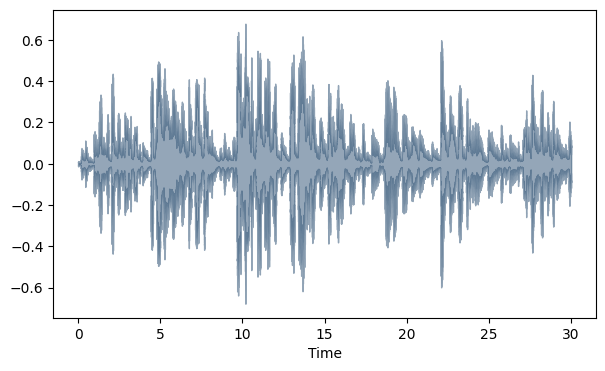

In [45]:
# Wave form of the audio
plt.figure(figsize=(7,4))
librosa.display.waveshow(data,color="#2B4F72", alpha = 0.5)
plt.show()

A spectrogram is a visual representation of the signal loudness of a signal over time at different frequencies included in a certain waveform. We can examine increase or decrease of energy over period of time. Spectrograms are also known as sonographs, voiceprints, and voicegrams.  We can also know how energy levels change over time period.

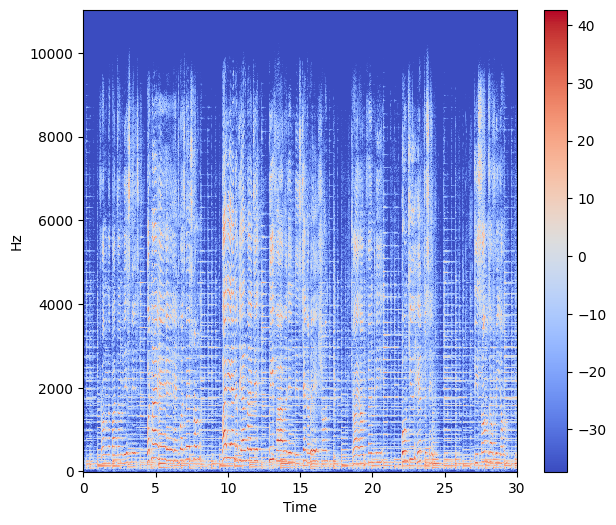

In [46]:
# Spectrogram of the audio
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(7,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

## Data Pre Processing

### Extracting Audio features 
The process of extraction of features from the data to utilize them for analysis is
known as feature extraction. Each audio signal consists of various audio features
however we must extract features that are relevant to the problem that we are solving.
Here are some features listed which are used in our project.

### Spectral roll off 
It computes the rolloff frequency for each frame in a given signal. The frequency under which some percentage (cutoff) of the total energy of a spectrum is obtained. It can be used to differentiate between the harmonic and noisy sounds.   Spectral Roll off

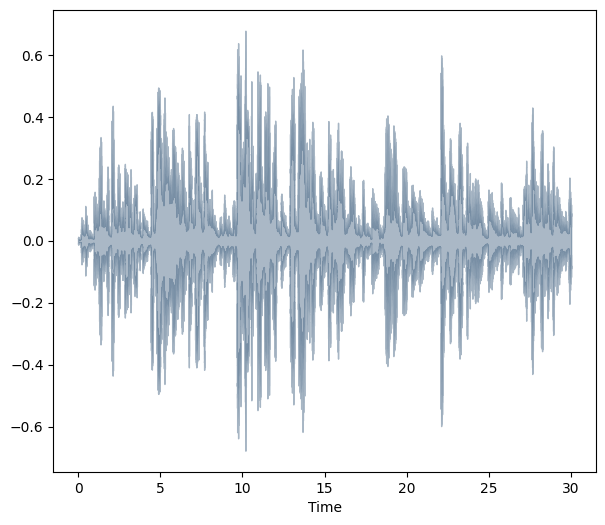

In [47]:
spectral_rolloff=librosa.feature.spectral_rolloff(y=data,sr=sr)[0]
plt.figure(figsize=(7,6))
librosa.display.waveshow(data,sr=sr,alpha=0.4,color="#2B4F72")

### Chroma feature 
It closely relates with the twelve different pitch classes. Chroma based features are also called as pitch class profiles. It is the powerful tool for analyzing and categorizing them. Harmonic and melodic characteristics of music are captured by them. Chroma featue

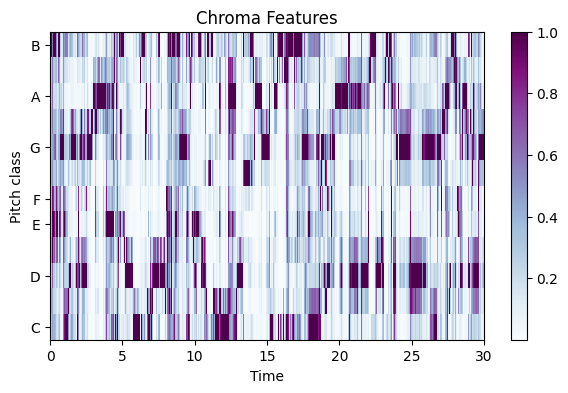

In [48]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(y=data,sr=sr)
plt.figure(figsize=(7,4))
lplt.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="BuPu")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

### Zero Crossing Rate
It is the rate at which a signal transitions from positive to zero to negative or from negative to zero or simply said the number of times the signal crosses x-axis is as the zero-crossing rate (ZCR). 

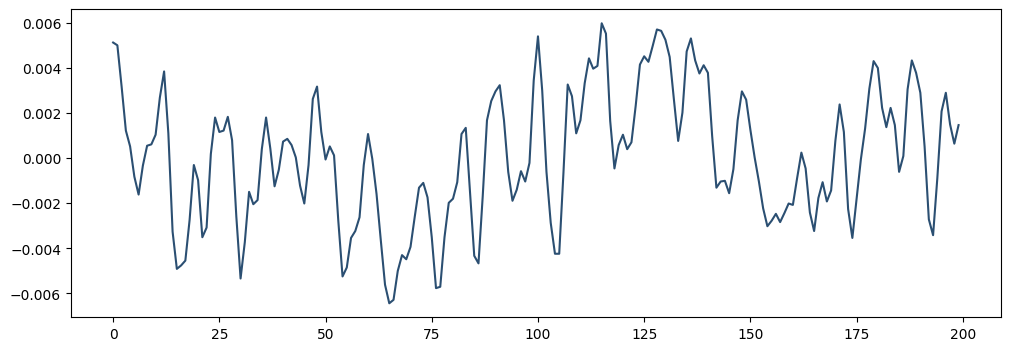

In [49]:
start=1000
end=1200
plt.figure(figsize=(12,4))
plt.plot(data[start:end],color="#2B4F72")

In [50]:
# Printing the number of times signal crosses the x-axis
zero_cross_rate=librosa.zero_crossings(data[start:end],pad=False)
print("The number of zero_crossings are :", sum(zero_cross_rate))

The number of zero_crossings are : 36


## Exploratory Data Analysis(EDA)
Vizualizing the audio files, wave plots and spectrograms for all the 10 genre classes

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

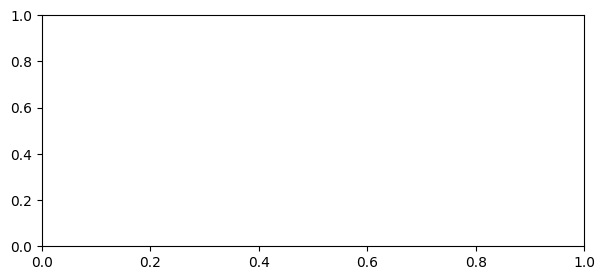

In [51]:
# EDA for all the music genre classes

# 1. BLUES 
audio1= 'genres_original/blues/blues.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4,)
plt.title('Waveplot - BLUES')

# Creating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - BLUES')
plt.colorbar(format='%+2.0f dB');
# playing audio
ipd.Audio(audio1) 

In [ ]:
# 2. CLASSICAL -
audio1= 'genres_original/classical/classical.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - CLASSICAL') 

# Creating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram -CLASSICAL')
plt.colorbar(format='%+2.0f dB');

# playing audio
ipd.Audio(audio1) 

In [ ]:
# 3. COUNTRY
audio1= 'Data/genres_original/country/country.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - COUNTRY')

# Ccreating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - COUNTRY')
plt.colorbar(format='%+2.0f dB');

# playing audio
ipd.Audio(audio1)

In [ ]:
# 4. DISCO
audio1= 'Data/genres_original/disco/disco.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - DISCO')

# Creating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - DISCO')
plt.colorbar(format='%+2.0f dB');
# playing audio
ipd.Audio(audio1) 

In [ ]:
# 5. HIPHOP
audio1= 'Data/genres_original/hiphop/hiphop.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr, alpha = 0.4)
plt.title('Waveplot - HIPHOP')

# Creating log mel spectrogram 
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000,) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - HIPHOP')
plt.colorbar(format='%+2.0f dB');

# playing audio
ipd.Audio(audio1)

In [ ]:
# 6. JAZZ
audio1= 'Data/genres_original/jazz/jazz.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - JAZZ')

# Creating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - JAZZ')
plt.colorbar(format='%+2.0f dB');

# playing audio
ipd.Audio(audio1)

In [ ]:
# 7. METAL
audio1= 'Data/genres_original/metal/metal.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - METAL')

# creating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - METAL')
plt.colorbar(format='%+2.0f dB');

# playing audio
ipd.Audio(audio1)

In [ ]:
# 8. POP
audio1= 'Data/genres_original/pop/pop.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(8, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - POP') 

# Creating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - POP')
plt.colorbar(format='%+2.0f dB');

# playing audio
ipd.Audio(audio1)


In [ ]:
# 9. REGGAE
audio1= 'Data/genres_original/reggae/reggae.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - REGGAE')

# Creating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - REGGAE')
plt.colorbar(format='%+2.0f dB');

# playing audio
ipd.Audio(audio1)

In [ ]:
# 10.ROCK
audio1= 'Data/genres_original/rock/rock.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - ROCK')

# Creating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - ROCK')
plt.colorbar(format='%+2.0f dB');

# Playing audio
ipd.Audio(audio1)

In [ ]:
# Finding misssing values
# Find all columns with any NA values
print("Columns containing missing values",list(df.columns[df.isnull().any()]))

In [ ]:
# Label Encoding - encod the categorical classes with numerical integer values for training

# Blues - 0
# Classical - 1
# Country - 2
# Disco - 3
# Hip-hop - 4 
# Jazz - 5  
# Metal - 6 
# Pop - 7
# Reggae - 8
# Rock - 9

class_encod=df.iloc[:,-1]
converter=LabelEncoder()
y=converter.fit_transform(class_encod)
y

In [ ]:
#features
print(df.iloc[:,:-1])

In [ ]:
# Drop the column filename as it is no longer required for training
df=df.drop(labels="filename",axis=1)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

In [ ]:
# splitting 70% data into training set and the remaining 30% to test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
# test data size
len(y_test)

In [ ]:
# size of training data
len(y_train)

## K-Nearest Neighbors (KNN)
KNN is a fundamental Machine learning algorithm that is most commonly used
among all kinds of problems. It classifies the data points based on the point that is
near them by finding the euclidians distance given by d = ((x2-x1)^2 - (y2-y1)^2)^1/2 as a metric.

In [ ]:
# Applying K nearest Neighbour algorithm to predict the results
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

clf1=KNeighborsClassifier(n_neighbors=3)
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_test)
print("Training set score: {:.3f}".format(clf1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf1.score(X_test, y_test)))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(8,3)})
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test,y_pred))